In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Loading

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('processed_data_Scaling.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (36168, 49)
X_test shape: (9042, 49)


# RF Model

Random Forest - Training Accuracy: 0.901598097765981
Random Forest - Test Accuracy: 0.8626410086264101
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7949
           1       0.44      0.54      0.49      1093

    accuracy                           0.86      9042
   macro avg       0.69      0.72      0.70      9042
weighted avg       0.88      0.86      0.87      9042



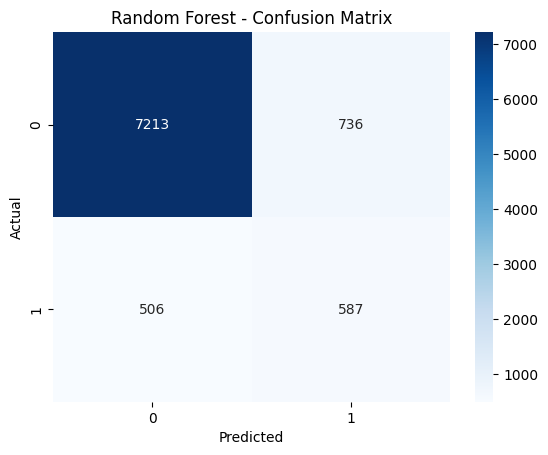

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
# rf_model = RandomForestClassifier(random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    class_weight='balanced',
    random_state=42
)

# { 'max_depth': None, 'n_estimators': 200}

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [4]:
# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8001843177521107


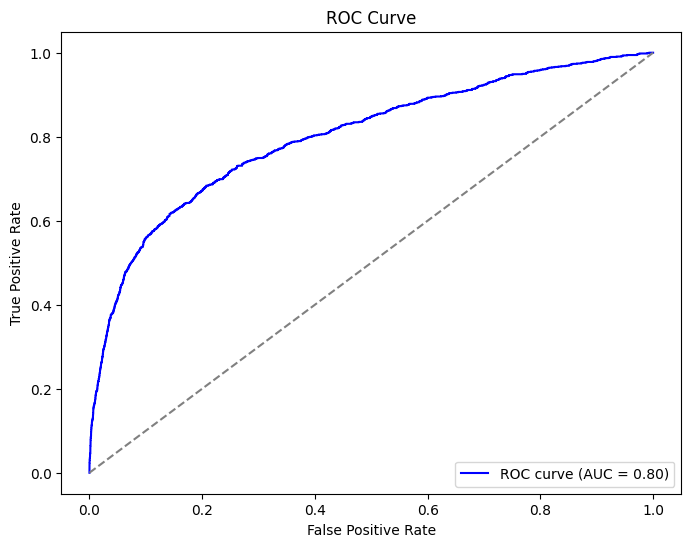

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Tunning

In [6]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': ['balanced', 'balanced_subsample']
# }

# # Initialize Random Forest and GridSearch
# rf_model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# # Fit GridSearch
# grid_search.fit(X_train, y_train)

# # Best Parameters
# print("Best Parameters:", grid_search.best_params_)

# # Use the best model
# best_rf_model = grid_search.best_estimator_


# # Make predictions
# rf_tune_y_pred_train = best_rf_model.predict(X_train)
# rf_tune_y_pred_test = best_rf_model.predict(X_test)

# # Evaluate
# print("Random Forest Post-Tuning - Training Accuracy:", accuracy_score(y_train, rf_tune_y_pred_train))
# print("Random Forest Post-Tuning - Test Accuracy:", accuracy_score(y_test, rf_tune_y_pred_test))

# # Classification Report
# print("Random Forest Post-Tuning - Classification Report:")
# print(classification_report(y_test, rf_tune_y_pred_test))

# ## Confusion Matrix
# conf_matrix = confusion_matrix(y_test, rf_tune_y_pred_test)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title("Random Forest - Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


## ROC

In [ ]:
# # Get predicted probabilities for the positive class
# y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import roc_auc_score

# # Calculate ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# print("ROC-AUC Score:", roc_auc)

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve

# # Get ROC curve data
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()